<a href="https://colab.research.google.com/github/SarangMohaniraj/ArtificialIntelligence/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1gcKcnQKu7BTl2I3Y6d6lVIlaJiTcVZKR)

Linear Regression is a basic analysis technique that uses the data to find a linear relationship. It is used to predict an output. It is generally used in statistics, but it is used in Machine Learning to minimize error.

[Interactive Ordinary Least Squares Regression Demo](http://setosa.io/ev/ordinary-least-squares-regression/)

## Basic Concepts

**Input Variable**
The variable used to predict the value of the output variable. Generally referred to as **X**.

**Output Variable**
The variable we want to predict. Generally referred to as **Y**.


The most common style is **Ordinary Least Squares (OLS) Regression**.
The representation of the model is $ \bf{ \hat{y} = b_0 + b_1 x} $

## Data Preparation

* Transform data for linear relationship (ex. log transform for linear relationships)
* Remove noise such as outliers
* Rescale inputs using standardization or normalization

The data in this example will not need to be adjusted

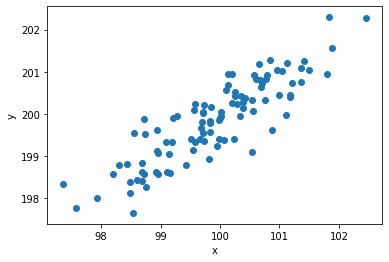

In [0]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


rng = np.random.RandomState(123)
mean = [100, 200]
cov = [[1, 0.9], [0.9, 1]]
sample = rng.multivariate_normal(mean, cov, size=100)
x, y = sample[:, 0], sample[:, 1]

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

vstack stacks the two arrays vertically, and corrcoef creates a correlation coefficient matrix between the x and y values

In [0]:
np.corrcoef(np.vstack([x,y]))

array([[1.        , 0.87552229],
       [0.87552229, 1.        ]])

covariance: $ \frac{1}{n} \sum (x_i - \bar{x})(y_i - \bar{y}) $

variance: $ \sigma^{2}_{x} = \frac{1}{n} \sum (x_i - \bar{x})^2 $

slope: $ b_1 = \frac{\text{covariance}}{\text{variance}} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2} $ 

y-intercept: $ b_0 = \bar{y} - b_1 \bar{x}$

## 1. Ordinary Least Squares Regression Using Classical Statistics

In [0]:
covariance = np.cov(np.vstack((x,y)), ddof=0)[0,1] #ddof = 0 creates a simple mean
variance = np.var(x, ddof = 0)

b1 = covariance/variance #slope
b0 = np.mean(y) - b1 * np.mean(x) #y-intercept

print('slope: %.2f' % b1)
print('y-intercept: %.2f' % b0)

slope: 0.84
y-intercept: 115.59


## 2. Ordinary Least Squares Regression Using Linear Algebra

$$\hat{c} = (X^T X)^{-1} X^T y$$
[Proof of the Matrix Approach](https://medium.com/@andrew.chamberlain/the-linear-algebra-view-of-least-squares-regression-f67044b7f39b)

In [0]:
X = x[:, np.newaxis] #transforming x into a column vector

#add column vector of ones
Xb = np.hstack((np.ones((X.shape[0],1)),X))
b = [np.zeros(X.shape[1])]

z = np.linalg.inv(np.dot(Xb.T, Xb))
b = np.dot(z, np.dot(Xb.T, y)) #final matrix of y-intercept and slope
b0, b1 = b[0], b[1]

print('slope: %.2f' % b1)
print('y-intercept: %.2f' % b0)

slope: 0.84
y-intercept: 115.59


## 3. Using a Pre-Implemented Function

There are many libraries, but this example uses Numpy

In [0]:
b = np.polyfit(x, y, deg=1) #Least squares polynomial fit
b0, b1 = b[1], b[0]

print('slope: %.2f' % b1)
print('y-intercept: %.2f' % b0)

slope: 0.84
y-intercept: 115.59


## Show Line of Fit

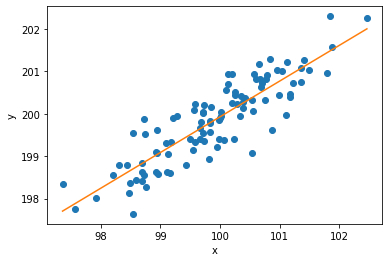

In [0]:
endpointsX = np.array([np.min(x), np.max(x)]) #min and max x values
endpointsY = b0 + endpointsX*b1 #use slope to find min and max y values to know the endpoints of the line to graph it

plt.figure()
plt.plot(x, y, marker='o', linestyle='') #scatterplot
plt.plot(endpointsX, endpointsY) #linear model
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Coefficient of Determination

Assesses how well a model explains and predicts future outcomes

$ \text{Total Sum of Squares: } SS_{total} = \sum_{i=1}^{n} ( y_i - \bar{y_i})^2$

$ \text{Residual Sum of Squares: } SS_{residual} = \sum_{i=1}^{n} ( \hat{y_i} - \bar{y_i})^2$

$ \text{Coefficient of Determination: } r^2 = \frac{SS_{residual}}{SS_{total}}$

In [0]:
def coefficient_of_determination(x,y,b1,b0):
  SS_total = np.sum((y - np.mean(y))**2)
  SS_residual = np.sum(((b0 + x*b1) - np.mean(y))**2)
  r_squared = SS_residual / SS_total
  return r_squared

coefficient_of_determination(x,y,b1,b0)

0.7665392849276508

# Evaluate

Now that we created a linear model for our data, we have to assess how well it fits through residuals (prediction errors). A residual is the distance an individual point is from the line of best fit. 

## Mean Squared Error (MSE)


$$\text{Hypothesis function: } h(x)=b_0 + b_1 x$$

$$ \large{MSE = J(\theta) = \frac{1}{n} \sum (h_\theta(x^{(i)}) - y^{(i)})^2}$$

The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”, also known as the residuals) and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences. It’s called the mean squared error as you’re finding the average of a set of errors. The smaller the means squared error, the closer you are to finding the line of best fit.

MSE is the cost function in Linear Regression and is used to optimize weights. The goal is to minimize MSE to improve the accuracy of the model.

[Difference between Least absolute deviations (L1) and Mean Squared Error (L2)](http://rishy.github.io/ml/2015/07/28/l1-vs-l2-loss/)

In [0]:
def cost_function(x,y,b1,b0):
  #plug x values into model
  mse = np.mean(((b0 + x*b1) - y)**2)
  return mse;

mse = cost_function(x,y,b1,b0)
mse

0.21920128791623805

## Root Mean Squared Error (RMSE)


Root Mean Square Error (RMSE) is the standard deviation of the residuals. RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. 

In [0]:
rmse = np.sqrt(mse)
rmse

0.46818937185314025

## Residual Plot

Text(0.5, 0, 'index')

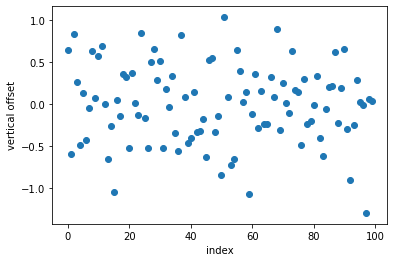

In [0]:
plt.scatter(np.arange(x.shape[0]), y - (b0 + x*b1))
plt.ylabel('vertical offset')
plt.xlabel('index')

## Gradient Descent for Linear Regression

To minimize MSE, use Gradient Descent to calculate the gradient of the cost function. [Click here for Gradient Descent explained.](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)

Given the rewritten cost function (MSE) $$ f(m,b) = J(\theta) = \frac{1}{n} \sum (h_\theta(x^{(i)}) - y^{(i)})^2$$

The gradient can be calculated as $$ f'(m,b) = \frac{\partial}{\partial{\theta_0}}J(\theta_0,\theta_1) = \begin{bmatrix} \frac{d}{dm} \\ \frac{d}{db} \end{bmatrix} = \begin{bmatrix} \frac{1}{N} \sum 2x^{(i)}(h_\theta(x^{(i)}) - y^{(i)}) \\ \frac{1}{N} \sum 2(h_\theta(x^{(i)}) - y^{(i)} \end{bmatrix}$$

To solve for the gradient, we iterate through our data points using our new m and b values and compute the partial derivatives. This new gradient tells us the slope of our cost function at our current position (current parameter values) and the direction we should move to update our parameters. The size of our update is controlled by the learning rate.

$$ \theta_0 := \theta_0 - \alpha \frac{\partial}{\partial{\theta_0}}J(\theta_0,\theta_1)  \\  \theta_1 := \theta_1 - \alpha \frac{\partial}{\partial{\theta_1}}J(\theta_0,\theta_1) $$

$b_1$ is the weight and $b_0$ is the bias

In [0]:
b1,b0 = 100,140
def update_weights(x,y,b1,b0, learning_rate): #b1 is weight, b0 is bias
  #derivatives of weight and bias
  gradient_b1 = 0
  gradient_b0 = 0
  N = len(x)
  for i in range(N):
    # Calculate partial derivatives
    # -2x(y - (b1*x + b0))
    gradient_b1 += 2 * x[i] *((b1*x[i] + b0) - y[i])
    
    # -2(y - (b1*x + b0))
    gradient_b0 += 2*((b1*x[i] + b0) - y[i])

  # We subtract because the derivatives point in direction of steepest ascent
  b1 -= (gradient_b1 / N) * learning_rate
  b0 -= (gradient_b0 / N) * learning_rate

  return b1,b0
    

### Training

Training a model is the process of iteratively improving your prediction equation by looping through the dataset multiple times, each time updating the weight and bias values in the direction indicated by the slope of the cost function (gradient). Training is complete when we reach an acceptable error threshold, or when subsequent training iterations fail to reduce our cost.

Before training we need to initialize our weights (set default values), set our hyperparameters (learning rate and number of iterations), and prepare to log our progress over each iteration.

In [0]:
def train(x,y,b1,b0,learning_rate,iterations): #b1 is weight, b0 is bias
  cost_history = [] #use later to see how cost is being minimized
  
  for i in range(iterations):
    b1,b0 = update_weights(x, y, b1, b0, learning_rate)
    cost = cost_function(x,y,b1,b0)
    cost_history.append(cost)
      
    # Log Progress
    if i % 100 == 0:
      print("iteration={:d}    weight={:.2f}    bias={:.4f}    cost={}".format(i, b1, b0, cost))
    
  return b1, b0, cost_history
b1,b0,cost_history = train(x,y,b1,b0,0.000001,1000)

iteration=0    weight=98.02    bias=139.9801    cost=94719636.86279106
iteration=100    weight=13.57    bias=139.1350    cost=1678191.5490354095
iteration=200    weight=2.33    bias=139.0225    cost=29733.55980093802
iteration=300    weight=0.84    bias=139.0075    cost=527.0730239166669
iteration=400    weight=0.64    bias=139.0055    cost=9.608292979820972
iteration=500    weight=0.61    bias=139.0052    cost=0.4401328422680557
iteration=600    weight=0.61    bias=139.0052    cost=0.277696339048588
iteration=700    weight=0.61    bias=139.0052    cost=0.27481837475539966
iteration=800    weight=0.61    bias=139.0052    cost=0.27476738232787584
iteration=900    weight=0.61    bias=139.0052    cost=0.27476647665837617


### Plot iteration vs cost

Text(0.5, 0, 'iteration')

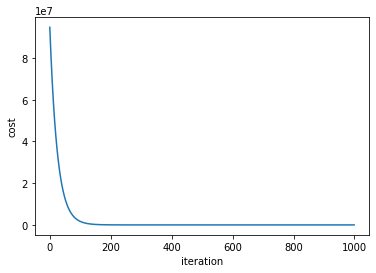

In [0]:
plt.plot(list(range(1000)),cost_history)
plt.ylabel('cost')
plt.xlabel('iteration')

# Multiple Linear Regression